| WIDS Córdoba 2020 |
|--:|

# Workshop Selección de variables y reducción de dimensión

##### Victoria Dumas

_Programa de Ciencia de Datos - Fundación Sadosky_

* * *

## Árboles de decisión

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importamos el clasificador
from sklearn.model_selection import train_test_split # Importamos la función para particionar el dataset
from sklearn import metrics # Importamos el módulo metricas de scikit-learn metrics para calcular la precisión de la predicción

El dataset con el que trabajaremos ahora se origina en el National Institute of Diabetes and Digestive and Kidney Diseases. El objetivo de este dataset es predecir si el paciente tiene o no diabetes en función de ciertas mediciones diagnósticas incluidas en el dataset. Las instancias que lo componen fueron seleccionadas de un dataset más grande. En particular todas las pacientes aquí son mujeres de al menos 21 años de ascendencia indígena Pima.

In [6]:
col = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# cargamos el dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col)
pima = pima.drop(index=0)

# dividimos el dataset en atributos y la variable a predecir (o target)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Atributos
y = pima.label # Variable target

In [8]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


### Calculamos la importancia de cada variable

In [10]:
# Utilizaremos Random Forest Regressor, calculamos la importancia de cada variable en la muestra

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y) #Entrenamiento
print("Features sorted by their score:") 
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature_cols), 
             reverse=True)) #los scores son suma 1

Features sorted by their score:
[(0.3342, 'glucose'), (0.173, 'bmi'), (0.1445, 'age'), (0.138, 'pedigree'), (0.0802, 'bp'), (0.0712, 'pregnant'), (0.0588, 'insulin')]


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Veámosla gráficamente

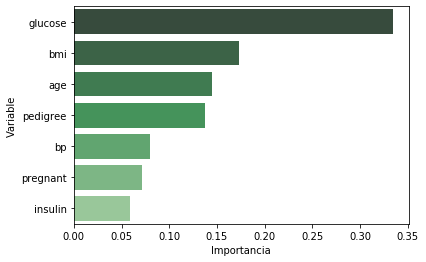

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
feat_imp_df = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature_cols), 
             reverse=True))
mapping = {feat_imp_df.columns[0]:'Importancia', feat_imp_df.columns[1]: 'Variable'}
feat_imp_df = feat_imp_df.rename(columns=mapping)
sns.barplot(x=feat_imp_df['Importancia'],y=feat_imp_df['Variable'], palette="Greens_d")

In [15]:
# dividimos el dataset en atributos y la variable a predecir (o target). Aca se corre el clasificador 
#con todas las columnas para tener un benchmark
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Atributos
y = pima.label # Variable target

# Dividimos el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Creamos el objeto clasificador de tipo árbol de decisión
clf = DecisionTreeClassifier()

# Entrenamos el clasificador
clf = clf.fit(X_train,y_train)

# Predecimos la respuesta para el set de testeo
y_pred = clf.predict(X_test)

### Evaluación del modelo

In [16]:
# Calculamos la precisión del modelo. Cuan frecuentemente el clasificador es correcto?
print("Precisión:",metrics.accuracy_score(y_test, y_pred), "\n")

Precisión: 0.6623376623376623 



Qué opinan de este resultado?

### Y si ahora probamos utilizando sólo las 4 variables más importantes?

In [17]:
# Seleccionamos las columnas que mejor score de importancia obtuvieron
selected_cols = ['bmi', 'glucose','age']
X = pima[selected_cols] # Atributos
y = pima.label # Variable target

# Dividimos el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Creamos el objeto clasificador de tipo árbol de decisión
clf_4 = DecisionTreeClassifier()

# Entrenamos el clasificador
clf_4 = clf_4.fit(X_train,y_train)

# Predecimos la respuesta para el set de testeo
y_pred = clf_4.predict(X_test)

# Calculamos la precisión del modelo. Cuan frecuentemente el clasificador es correcto?
print("Precisión:",metrics.accuracy_score(y_test, y_pred), "\n")

Precisión: 0.7229437229437229 



Qué me cuentan ahora? Funcionó la selección de variables?

### Y si ahora probamos con Random Forests? 
#### Primero usando el modelo con todas las variables

In [18]:
from sklearn.ensemble import RandomForestClassifier

# dividimos el dataset en atributos y la variable a predecir (o target)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Atributos
y = pima.label # Variable target

# Creamos el objeto clasificador de tipo RF
rfclf = RandomForestClassifier()

# Entrenamos el clasificador
rfclf = rfclf.fit(X_train,y_train)

# Predecimos la respuesta para el set de testeo
y_pred = rfclf.predict(X_test)

# Calculamos la precisión del modelo. Cuan frecuentemente el clasificador es correcto?
print("Precisión:",metrics.accuracy_score(y_test, y_pred), "\n")

Precisión: 0.7705627705627706 



C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Vemos que la mejora es significativa

#### Ahora con el modelo con las 4 variables seleccionadas

In [20]:
# Seleccionamos las columnas que mejor score de importancia obtuvieron
selected_cols = ['bmi', 'glucose','age']
X = pima[selected_cols] # Atributos
y = pima.label # Variable target

# Dividimos el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Creamos el objeto clasificador de tipo RF
rfclf_4 = RandomForestClassifier()

# Entrenamos el clasificador
rfclf_4 = rfclf_4.fit(X_train,y_train)

# Predecimos la respuesta para el set de testeo
y_pred = rfclf_4.predict(X_test)

# Calculamos la precisión del modelo. Cuan frecuentemente el clasificador es correcto?
print("Precisión:",metrics.accuracy_score(y_test, y_pred), "\n")

Precisión: 0.7662337662337663 



C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
rfclf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Y ahora qué les parece este resultado?

### Visualización de árboles de decisión

Como mencionamos, una ventaja de los árboles de decisión es que permiten ser visualizados gráficamente. Veamos como hacerlo:

In [25]:
# Para esto nos valemos de dos librerías extra, que instalaremos escribiendo en la terminal lo siguiente:
# conda install graphviz
# conda install pydotplus

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
#El color tiene que ver con la pureza del nodo.


InvocationException: GraphViz's executables not found

Qué les parece el árbol resultante?

Se trata de un árbol muy grande, que no está podado, es decir, no se ha limitado su profundidad, por lo que resulta demasiado grande y difícil de entender. A continuación veremos cómo optimizarlo...

### Optimización de árboles de decisión

In [26]:
# dividimos el dataset en atributos y la variable a predecir (o target)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Atributos
y = pima.label # Variable target

# Dividimos el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Creamos el objeto clasificador de tipo árbol de decisión. En el anterior creo que usa GINI 
clf_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Entrenamos el clasificador
clf_opt = clf_opt.fit(X_train,y_train)

# Predecimos la respuesta para el set de testeo
y_pred = clf_opt.predict(X_test)

# Model Accuracy, con qué frecuencia el clasificador acierta?
print("Precisión:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.7705627705627706


Vemos que la precisión ha mejorado con la poda, por lo que el modelo obtenido es mejor que el anterior. Ahora vamos a graficarlo

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_opt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

Este nuevo árbol es mucho más sencillo y fácil de interpretar.

* * *

# Estrategias de Reducción de dimensión
## Análisis de componentes principales

El Análisis de Componentes Principales es un método rápido y flexible para reducir las dimensiones en los datos. Su comportamiento es sencillo de visualizar en un dataset bidimensional. Consideremos los siguientes 200 puntos:

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

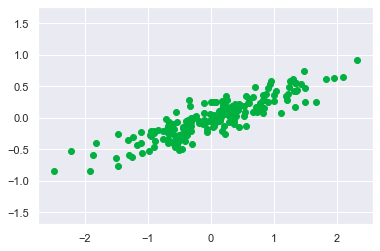

In [29]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], color='#00b140')
plt.axis('equal');

A ojo es claro que hay una relación bastante lineal entre las variables x e y. 

Veamos que podemos aprender de esa relación entre variables utilizando PCA.

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #son las dos primeras componentes principales con mayor varianza
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

"fit" aprende algunas de las cantidades que caracterizan a los datos, las más importantes son "components" y "explained variance":

In [32]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [33]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para entender lo que significan esos números, es útil visualizarlos como vectores sobre los datos, utilizando "components" para definir la dirección del vector y "explained variance" para definir la longitud al cuadrado del vector.

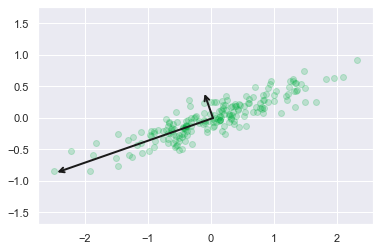

In [34]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="k")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color='#00b140')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud del vector es un indicador de cuan importante es ese eje para describir la distribución de los datos más precisamente, es una medida de la varianza de los datos proyectada en ese eje. 

La proyección de cada dato sobre los ejes principales son las componentes principales de ese dato.

### PCA para reducción de dimensiones
Utilizar PCA para reducción de dimensiones de los datos implica hacer cero una o más de las componenetes principales más pequeñas, resultando en un proyección de los datos con menos dimensiones que preserva la máxima varianza de los datos. Veamos un ejemplo:


In [35]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Los datos transformados han sido reducidos a una única dimensión. Para entender el efecto de esta reducción de dimensiones, podemos realizar la transformación inversa de estos datos reducidos y graficarla junto a los datos originales.


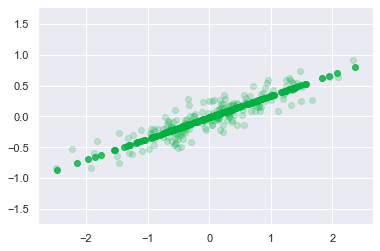

In [36]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color='#00b140')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='#00b140')
plt.axis('equal');

Los puntos más claros son los datos originales, mientras que los más oscuros son la versión proyectada. Esto deja bien claro lo que significa la reducción de dimensiones: la información a lo largo del eje principal menos importante es removida, dejando solo las componentes de los datos con mayor varianza.

## PCA como filtro de ruido

El Análisis de Componentes Principales puede ser utlizado para filtrar datos ruidosos. La idea es la siguiente:
Aquellos componentes con varianza mucho mayor al efecto del ruido relativamente no deberían ser afectadas por el ruido. Entonces si reconstruimos los datos utilizando solo el conjunto de componentes principales más importantes, estaríamos preferentemente manteniendo la señal y deshaciéndonos el ruido.

Veamos un ejemplo con el set de datos digits. En primer lugar vamos a mostrar los datos sin ruido.

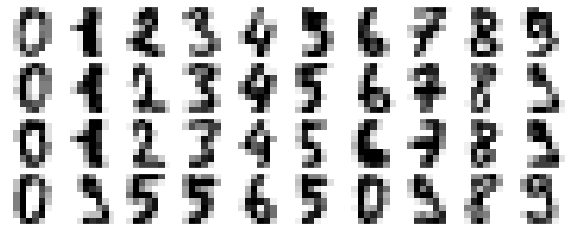

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agregaremos algo de ruido aleatorio para crear un set de datos ruidoso y vamos a graficarlo para ver como se ve:

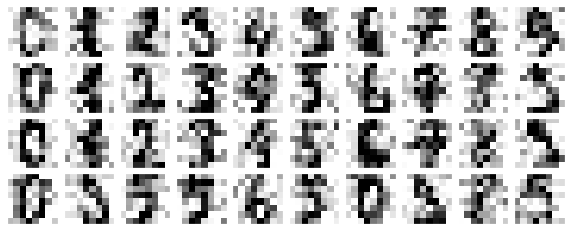

In [38]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Está claro a ojo que las imágenes son ruidosas ahora, y contienen píxeles espúreos. Entrenemos entonces un PCA con los datos ruidosos, poniendo como requisito que la proyección preserve el 50% de la varianza:

In [39]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Vemos que el 50% de la varianza está contenida en 12 componentes principales. Ahora calcularemos esas componentes y luego utilizaremos la transformada inversa pra reconstruir los dígitos filtrados: 

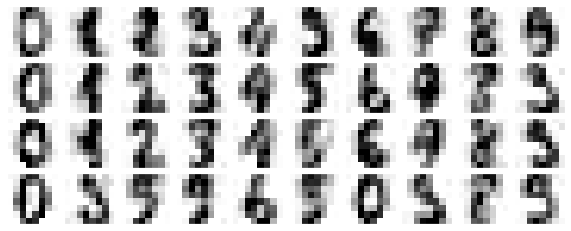

In [40]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservar la señal y filtrar el ruido hace que PCA sea una rutina muy útil para selección de atributos, en vez de entrenar un clasificador con datos con muchas dimensiones, es posible entrenar el clasificador en la representación de menos dimensiones la cual servirá automáticamente para filtrar el ruido aleatorio en las entradas.

## PCA para visualización de datos

Veamos otro ejemplo de reducción de dimensiones con propósitos de visualización para el sencillo y conocido dataset Iris

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])

df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Estandarización de los datos

Dado que el PCA genera un espacio de caracteristicas que maximiza la varianza a lo largo de los ejes, resulta necesario estandarizar los datos, especialmente si estos tienen diferentes escalas. Aunque todas las características en el dataset iris fueron medidas en centímetros, vamos a transformarlas a la escala de la distribución normal estándar (media=0 y varianza =1), que es un requisito para el desempeño óptimo de muchos algoritmos de machine learning.

In [42]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### Proyección a 2D

In [43]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['componente principal 1', 'componente principal 2'])
principalDf.head(5)

,componente principal 1,componente principal 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [44]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [45]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,componente principal 1,componente principal 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


#### Visualización de la proyección 2D

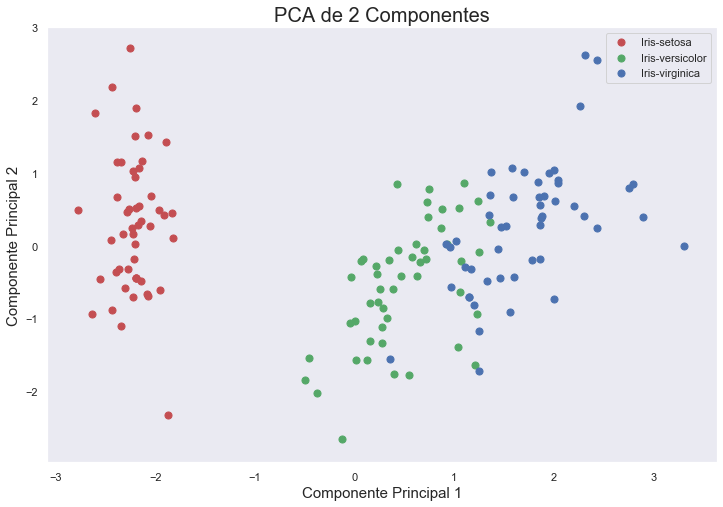

In [46]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('PCA de 2 Componentes', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'componente principal 1']
               , finalDf.loc[indicesToKeep, 'componente principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Las clases parecen estar bastante bien separadas!

* * *


#### Varianza explicada
La varianza explicada nos dice cuanta información (varianza) puede ser atribuida acada una de las componentes principales.

In [47]:
print(pca.explained_variance_ratio_)

# si sumamos la contribución de las dos componentes principales
print(sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523]
0.9580097536148198


Podemos ver que juntas las dos primeras componentes principales contienen el 95.8% de la información. La primera contiene el 72.77% de la varianza y la segunda el 23.03% de la varianza. Esto quiere decir el que ~4% restante está repartido entre la tercera y cuarta componente principal.

## PCA para acelerar otro algoritmo de machine learning

Si el algoritmo de machine learning que estamos usando es demasiado lento debido a que el set de datos tiene una gran cantidad de dimensiones, es una buena idea utilizar PCA para acelerarlo. Esta es, de echo, la aplicación más común de PCA. Veremos luego un ejemplo en el set de datos faces.

Si la memoria o el espacio en disco es limitado, algo que sucede muy frecuentemente, PCA nos permite ahorrar espacio en intercambio perdiendo poca información. Es cierto que no queremos perder información, pero si pensamos que puede ser la diferencia entre poder ejecutar un algoritmo con la computadora que tenemos a mano o no, es una buena solución de compromiso.

Cuáles son las limitaciones de PCA?

- No es invariante a la escala. Esto implica que debemos reescalar los datos primero
- Asume que las direcciones con más varianza son las más interesantes
- Si las variables están correlacionadas PCA puede reducir las dimensiones, si no, PCA solo las ordena de acuerdo a sus varianzas.

## PCA + Máquinas de soporte vectorial (SVM)

Veremos como utilizar PCA para acelerar un algoritmo de reconocimiento facial 

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# utilizamos los parámetros por defecto de seaborn
import seaborn as sns; sns.set()

In [49]:
from sklearn.datasets import fetch_lfw_people

# Cargamos el dataset
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

KeyboardInterrupt: 

Veamos qué pinta tiene este dataset para tener una idea de con qué estamos trabajando

In [ ]:
ig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [261]:
print(faces.images[2].shape)
print(faces.images[34].shape)

(62, 47)
(62, 47)


Cada imagen contiene 62 × 47 o aproximadamente 3,000 pixels. Podríamos utilizar cada píxel como un atributo, pero en general es más efectivo realizar algún tipo de preprocesamiento para extraer los atributos más importantes.

Aquí utilizaremos un Análisis de Componentes Principales (PCA) para extraer las 150 componentes fundamentales con las cuales alimentar a nuestro clasificador SVM. 
Sci-kit learn nos provee una forma muy sencilla de hacerlo, concatenando el preprocesador y el clasificador en un mismo pipeline.

Como es un dataset grande, utilizaremos **PCA aleatorizado** para aproximar las primeras N componentes principales mucho más rápido que lo que lo haríamos con un estimador estándar de PCA. Esto es muy útil con datasets de grandes dimensiones como este, que tiene alrededor de 3000 atributos.

In [263]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [264]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en set de entrenameinto y set de testeo
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finalmente, podemos utilizar un método de **validación cruzada** para explorar combinaciones de parámetros. Ajustaremos C, que controla la dureza de los márgenes y gamma que controla el tamaño de la función de de distribución radial kernel) y determinar el mejor modelo:

In [265]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Users/victoriadumas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 31.2 s, sys: 459 ms, total: 31.7 s
Wall time: 23.2 s
{'svc__C': 10, 'svc__gamma': 0.001}


Ahora con el modelo validado podemos predecir las etiquetas para los datos de testeo, que el modelo aún no ha visto:

In [266]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Veamos algunas de las imágenes y sus etiquetas predichas

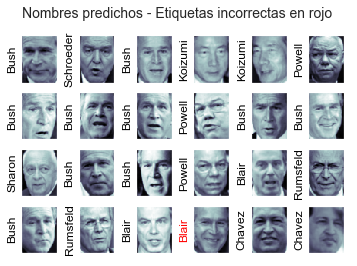

In [268]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Nombres predichos - Etiquetas incorrectas en rojo', size=14);

Al parecer al menos en el subconjunto que visualizamos el clasificador funcionó bastante bien. Pero veamos un reporte para tener una mejor idea de que tal anduvo

In [269]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



#### Y la matriz de confusión?

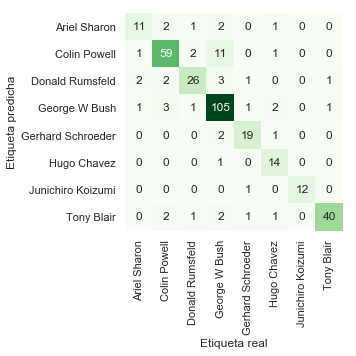

In [272]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Etiqueta real')
plt.ylabel('Etiqueta predicha');

Ahora que vimos que la predicción en base a 150 componentes principales funcionó bastante bien, veamos las imagenes asociadas con esas primeras componentes principales, que corresponderían a los vectores propios

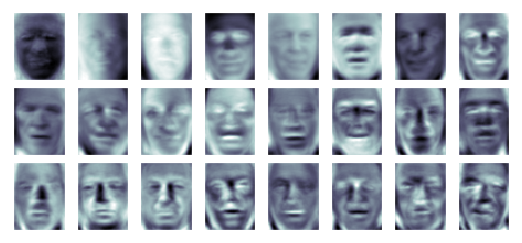

In [274]:
pca.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Estos resultados nos dan una idea de como las imágenes varían. Por ejemplo, las primeras desde la izquierda arriba parecen estar asociadas con el ángulo de ilumniación de la cara, y las últimas parecen detectar ciertos rasgos como los ojos, la nariz y los labios.

Veamos la varianza acumulada de esas componentes para ver cuánta información preserva la proyección:

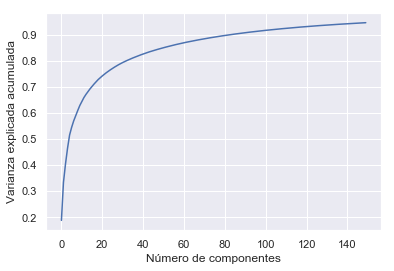

In [278]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada');

Vemos que esas 150 componentes engloban más del 90% de la varianza.
Esto es lo que nos lleva a considerar que utilizando estas 150 componentes, podríamos recuperar la mayoría de las características esenciales de los datos. Para verlo más concreto, podemos comparar las imágenes de entrada con las reconstruidas a partir de las 150 componentes:

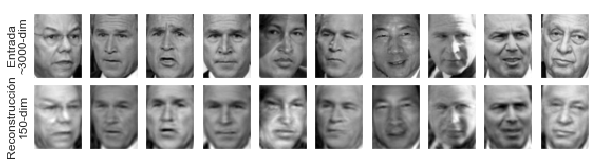

In [287]:
# Calcula las componentes y las caras proyectadas
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('Entrada\n~3000-dim')
ax[1, 0].set_ylabel('Reconstrucción\n150-dim');

La fila de arriba muestra las imágenes de entrada, mientras que la de abajo muestra la reconstrucción de las imágenes utilizando solo 150 de las ~3000 variables iniciales. Esta visualización deja claro por qué el clasificador fue tan exitoso: porque si bien reduce la dimensionalidad de los datos por aproximadamente un factor de 20, las imágenes proyectadas contienen suficiente información de manera que podemos a ojo reconocer a los individuos en las imágenes. 

***

_Lo que esto significa es que nuestro algoritmo de clasificación puede ser entrenado en un set de datos de 150 dimensiones en vez de uno de 3000 dimensiones! Y dependiendo del algoritmo que se elija puede producir una clasificación mucho más eficiente._

***

| Fin |
|--:|